# Time Series Analysis: Comparing Two Different Global Models

##### By Amanda Overbye

## Import Libraries

In [1]:
import s3fs
import intake
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds296-stevenson/share/proj failed


## Catalog Loading and Choosing data

In [2]:
# Open catalog and store as 'catalog'
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [3]:
# View catalog
catalog

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,522217
dcpp_init_year,60


In [4]:
# Convert the catalog to a Pandas dataframe
cat_df = catalog.df

In [5]:
# View unique CMIP6 activities
catalog.df.source_id.unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-LR',
       'ECMWF-IFS-HR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-CM4C192', 'GFDL-ESM2M', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'CanESM5',
       'SAM0-UNICON', 'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3',
       'EC-Earth3-Veg', 'FGOALS-f3-L', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

In [6]:
# Catalog search
res = catalog.search(activity_id = ["CMIP", "ScenarioMIP"],
                     source_id = ["GFDL-CM4", "GFDL-ESM4"],
                     experiment_id = ["historical", "ssp370", "ssp585"],
                     table_id = "Amon", 
                     member_id = "r1i1p1f1",
                     variable_id = "tas")
# Display contents of the catalog
display(res.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701
2,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp370,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
3,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
4,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20190726


In [7]:
# Project type: CMIP (historical) and ScenarioMIP (future)
activity_ids = ['ScenarioMIP', 'CMIP']

# Models: CanESM5 and CESM2
source_id = ['CanESM5', 'CESM2']

# Experiments: historical, SSP3-7.0, SSP5-8.5
experiment_ids = ['historical', 'ssp370', 'ssp585']

# Ensemble member: r10i1p1f1
member_id = 'r10i1p1f1'

# Data type: monthly atmospheric output
table_id = 'Amon'

# Variable: surface air temperature (tas)
variable_id = 'tas'


In [8]:
# Search cataloge based on specified terms
res = catalog.search(activity_id=activity_ids, source_id = source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
1,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,NCAR,CESM2,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
5,ScenarioMIP,NCAR,CESM2,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


In [9]:
# Read in the historical data file for CanESM5
hist_data = xr.open_zarr(res.df["zstore"][1], storage_options = {"anon": True})

# Read in the high climate scenario data file for CanESM5
ssp585_data = xr.open_zarr(res.df["zstore"][2], storage_options = {"anon": True})

# Read in the low climate scenario data file for CM4
ssp370_data = xr.open_zarr(res.df["zstore"][3], storage_options = {"anon": True})

## Area of Interest
For my area of interest, I have chosen to do the Southeast United States. The southeast has a unique mix of variable temperatures, human activities, and diverse ecology. Additionally, I used the live there and I would like to see how these models predict climate emission scenarios impact that area.

## Choosing Models

For this project, I use the Community Earth System Model 2 (CESM2) and the Canadian Earth System Model version 5 (CanESM5). The first thing I looked for when choosing the models was the level of emission I could choose from. Both of these models had ssp585 and ssp370. Additionally, I appreciate how the CanESM5 model includes the Canadian Terrestrial Ecosystem Model (CTEM). I thought that would be useful for this region considering how ecologically rich the southeast is, particularly in the Smokey Mountains. The CESM2 model seems to be more focused on abiotic factors but does take into account anthropogenic land use. I thought it would be interesting to compare the two models based on these differences. 

## Choosing Scenario 

I am using the ssp370 and the ssp585 experiments. Ssp585 represents the scenario with the highest amount of emissions. Ssp370 represents a middle to high amount of emissions and warming. I chose the look at the more severe end of the spectrum because I think it is a more probable scenario at this point than milder experiments. 

In [10]:
# Define area of interest
lat_min, lat_max = 25.0, 37.5 
lon_min, lon_max = 265.0, 285.0 

### Plot Area of Interest

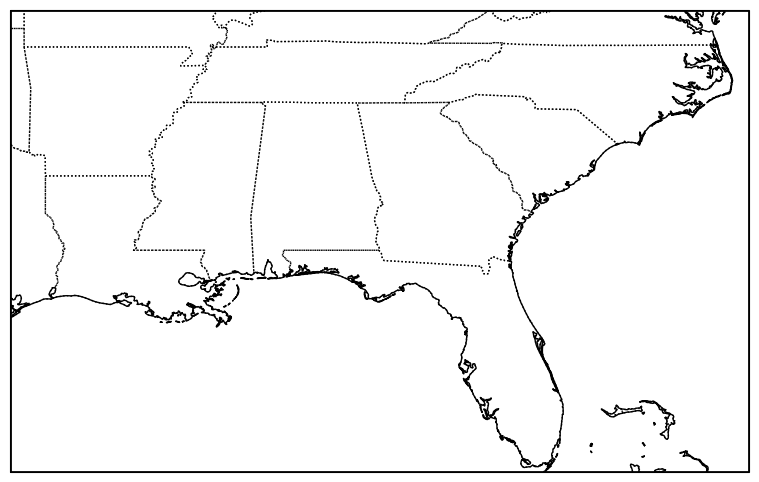

In [11]:
# Create plot to ensure the coordinates are where I want 
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) 

# Add features
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')

# Add the bounding box
ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
        [lat_min, lat_min, lat_max, lat_max, lat_min],
        transform=ccrs.PlateCarree(),
        color='Black', linewidth=2, label='Southeast U.S.')

## Prepare CanESM5 Model Data

In [12]:
# Merge historical and future projection data
canesm5_585_data = xr.concat([hist_data, ssp585_data], dim="time")
canesm5_370_data = xr.concat([hist_data, ssp370_data], dim="time")

# Convert time to datetime64 format
time = canesm5_585_data.time.astype('datetime64[ns]')
time = canesm5_370_data.time.astype('datetime64[ns]')

# Define logical mask for Southeast U.S.
tas_SE_lat = (canesm5_585_data.lat >= lat_min) & (canesm5_585_data.lat <= lat_max)
tas_SE_lon = (canesm5_585_data.lon >= lon_min) & (canesm5_585_data.lon <= lon_max)
tas_SE_370_lat = (canesm5_370_data.lat >= lat_min) & (canesm5_370_data.lat <= lat_max)
tas_SE_370_lon = (canesm5_370_data.lon >= lon_min) & (canesm5_370_data.lon <= lon_max)

# Apply mask and average
tas_SE_585 = canesm5_585_data.where(tas_SE_lat & tas_SE_lon, drop=True).mean(dim=["lat", "lon"])
tas_SE_370 = canesm5_370_data.where(tas_SE_370_lat & tas_SE_370_lon, drop=True).mean(dim=["lat", "lon"])

# Calculate annual mean temperature
canesm5_mean_ssp370 = tas_SE_370.groupby("time.year").mean()
canesm5_mean_ssp585 = tas_SE_585.groupby("time.year").mean()

# Convert to Celsius
canesm5_mean_ssp370 = canesm5_mean_ssp370 - 273.15
canesm5_mean_ssp585 = canesm5_mean_ssp585 - 273.15

## Create plots for CanESM5 Model Data

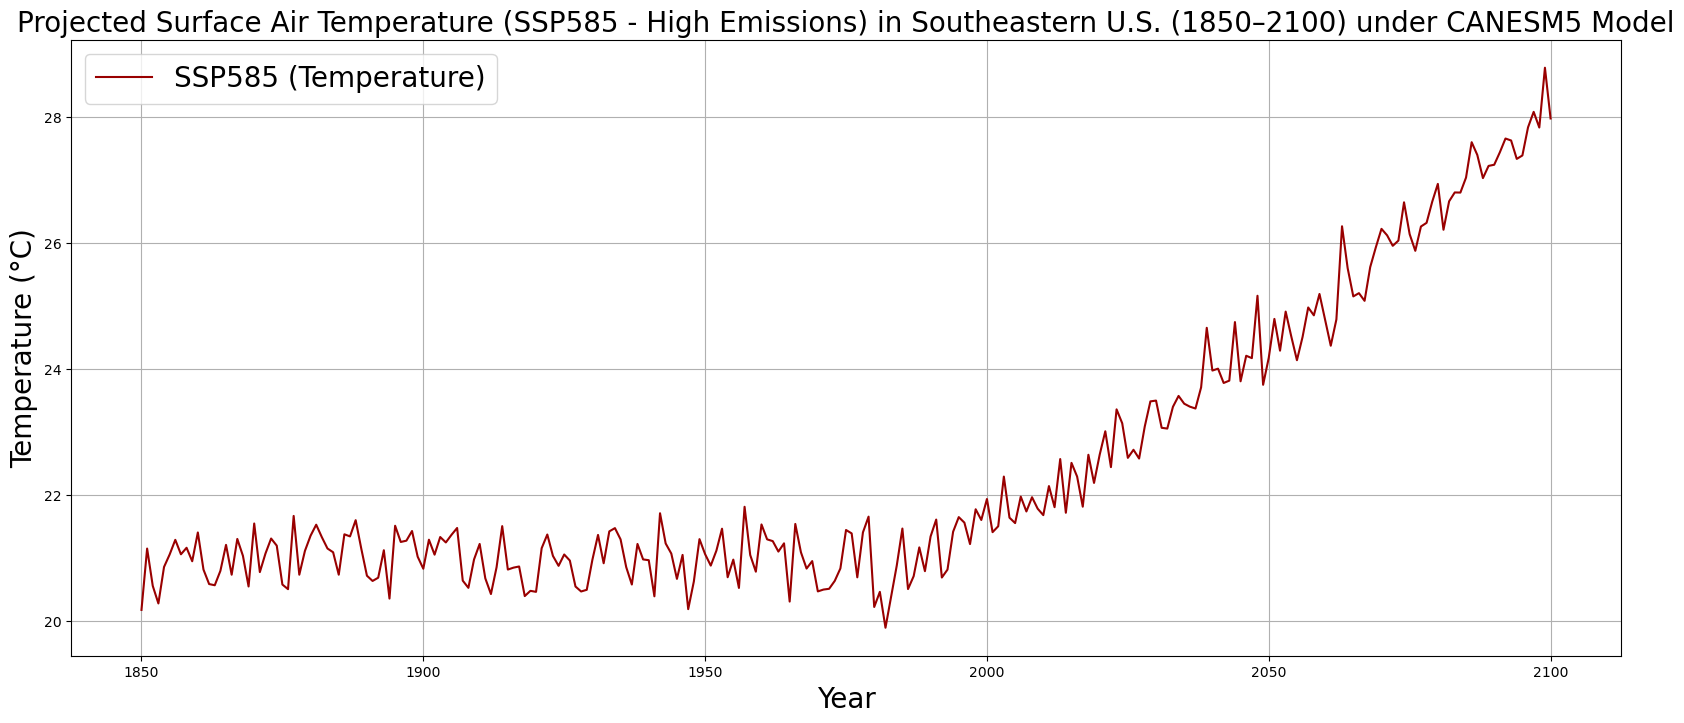

In [13]:
# Create figure
fig, ax = plt.subplots(figsize=(20, 8))

# Plot SSP585 (high emissions)
ax.plot(canesm5_mean_ssp585.year, canesm5_mean_ssp585.tas, 
        label='SSP585 (Temperature)', color='#990000')

# Titles and axis labels
ax.set_title("Projected Surface Air Temperature (SSP585 - High Emissions) in Southeastern U.S. (1850–2100) under CANESM5 Model", fontsize=20)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Temperature (°C)", fontsize=20)

# Add legend and grid
ax.legend(fontsize=20)
ax.grid()

# Show plot
plt.show()

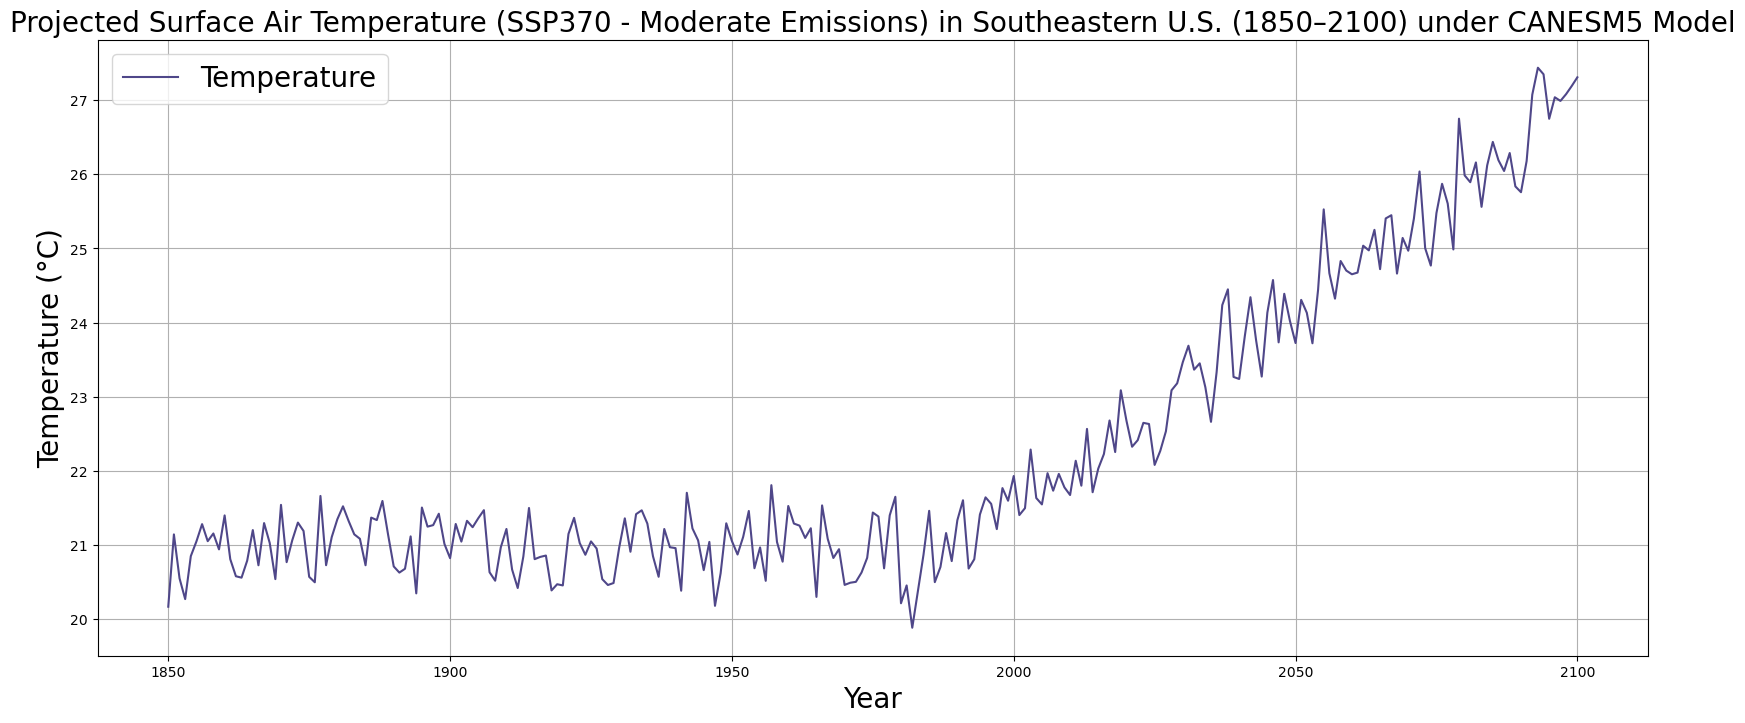

In [14]:
# Create figure
fig, ax = plt.subplots(figsize=(20, 8))

# Plot SSP370 (moderate emissions)
ax.plot(canesm5_mean_ssp370.year, canesm5_mean_ssp370.tas, 
        label='Temperature', color='#4F4789')

# Titles and axis labels
ax.set_title("Projected Surface Air Temperature (SSP370 - Moderate Emissions) in Southeastern U.S. (1850–2100) under CANESM5 Model", fontsize=20)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Temperature (°C)", fontsize=20)

# Add legend and grid
ax.legend(fontsize=20)
ax.grid()

# Show plot
plt.show()

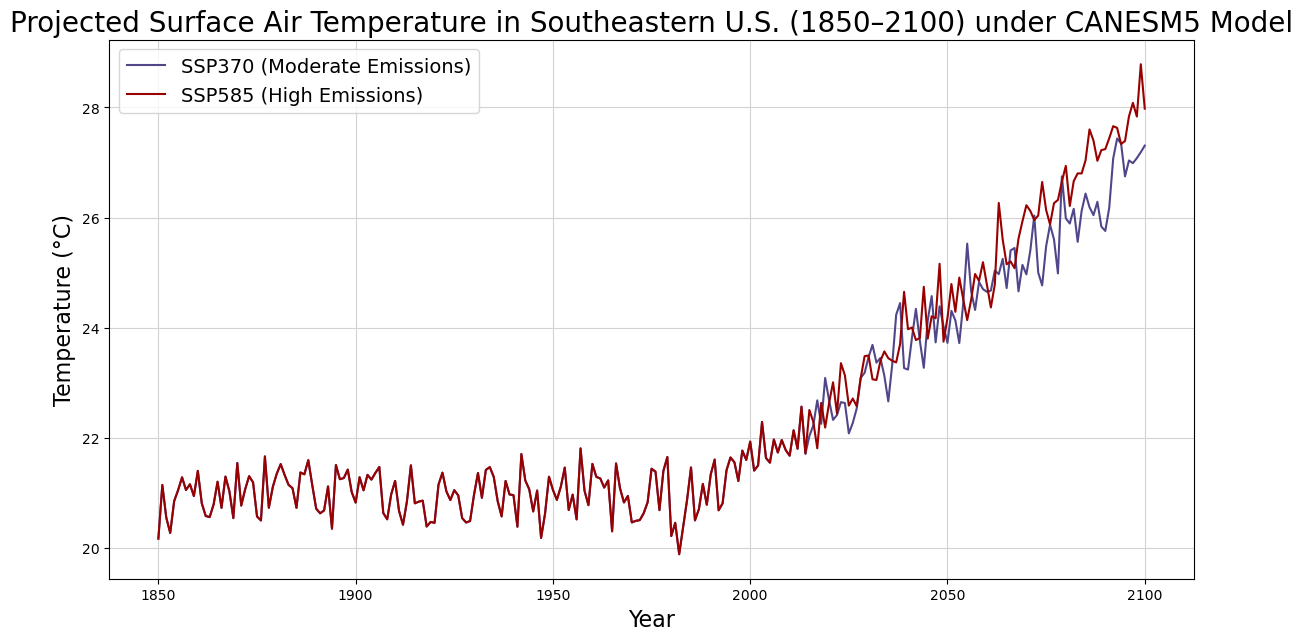

In [15]:
# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot SSP370 (moderate emissions)
ax.plot(canesm5_mean_ssp370.year, canesm5_mean_ssp370.tas, 
        label="SSP370 (Moderate Emissions)", color="#4F4789")

# Plot SSP585 (high emissions)
ax.plot(canesm5_mean_ssp585.year, canesm5_mean_ssp585.tas, 
        label="SSP585 (High Emissions)", color="#990000")

# Add major and minor grid lines
ax.grid(which='major', color='lightgray', linewidth=0.8)
ax.grid(which='minor', color='lightgray', linestyle=':', linewidth=0.5)

# Titles and axis labels
ax.set_title("Projected Surface Air Temperature in Southeastern U.S. (1850–2100) under CANESM5 Model", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Temperature (°C)", fontsize=16)

# Add legend
ax.legend(fontsize=14)

# Show plot
plt.show()

## Prepare CESM2 Model Data

In [16]:
# Read historical and future scenario data for CESM2
hist_data = xr.open_zarr(res.df["zstore"][0], storage_options={"anon": True})
ssp370_data = xr.open_zarr(res.df["zstore"][4], storage_options={"anon": True})
ssp585_data = xr.open_zarr(res.df["zstore"][5], storage_options={"anon": True})

# Merge historical with future projection data
cesm2_370_data = xr.concat([hist_data, ssp370_data], dim="time")
cesm2_585_data = xr.concat([hist_data, ssp585_data], dim="time")

# Convert time to datetime64 format
time = cesm2_585_data.time.astype('datetime64[ns]')

# Define logical mask for Southeast U.S.
tas_SE_lat = (cesm2_585_data.lat >= lat_min) & (cesm2_585_data.lat <= lat_max)
tas_SE_lon = (cesm2_585_data.lon >= lon_min) & (cesm2_585_data.lon <= lon_max)
tas_SE_370_lat = (cesm2_370_data.lat >= lat_min) & (cesm2_370_data.lat <= lat_max)
tas_SE_370_lon = (cesm2_370_data.lon >= lon_min) & (cesm2_370_data.lon <= lon_max)

# Apply mask and average spatially
tas_SE_585 = cesm2_585_data.where(tas_SE_lat & tas_SE_lon, drop=True).mean(dim=["lat", "lon"])
tas_SE_370 = cesm2_370_data.where(tas_SE_370_lat & tas_SE_370_lon, drop=True).mean(dim=["lat", "lon"])

# Calculate annual mean temperature
cesm2_mean_ssp370 = tas_SE_370.groupby("time.year").mean()
cesm2_mean_ssp585 = tas_SE_585.groupby("time.year").mean()

# Convert from Kelvin to Celsius
cesm2_mean_ssp370 = cesm2_mean_ssp370 - 273.15
cesm2_mean_ssp585 = cesm2_mean_ssp585 - 273.15

## Create plots for CESM2 Model Data

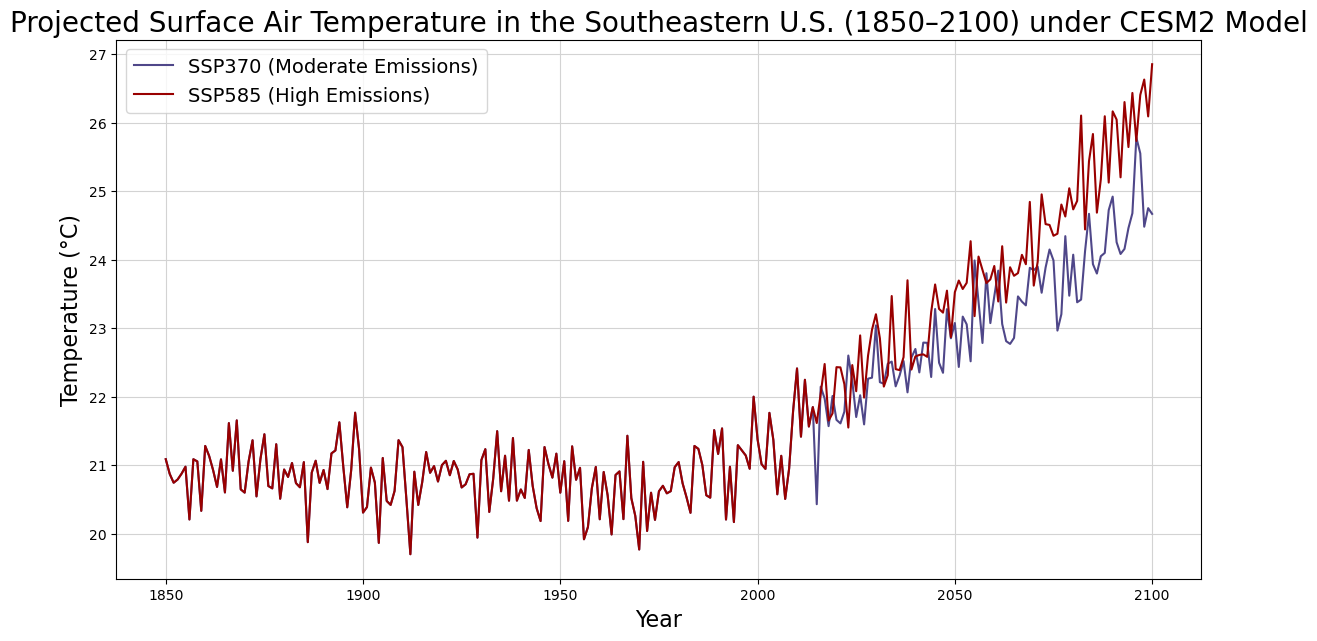

In [17]:
# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot SSP370 (moderate emissions)
ax.plot(
    cesm2_mean_ssp370.year,
    cesm2_mean_ssp370["tas"],
    label="SSP370 (Moderate Emissions)",
    color="#4F4789"
)

# Plot SSP585 (high emissions)
ax.plot(
    cesm2_mean_ssp585.year,
    cesm2_mean_ssp585["tas"],
    label="SSP585 (High Emissions)",
    color="#990000"
)

# Add grid lines
ax.grid(which='major', color='lightgray', linewidth=0.8)
ax.grid(which='minor', color='lightgray', linestyle=':', linewidth=0.5)

# Add title and axis labels
ax.set_title(
    "Projected Surface Air Temperature in the Southeastern U.S. (1850–2100) under CESM2 Model",
    fontsize=20
)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Temperature (°C)", fontsize=16)

# Add a legend
ax.legend(fontsize=14)

# Show plot
plt.show()

## Comparing Results

Both graphs show a similar shape denoting when temperatures have risen/are expected to rise. The CESM2 showed higher peaks and lower valleys than the CANESM5 model. Another difference is the distance between the different emission scenarios. The CESM2 model shows little over a 2-degree (C) difference, whereas the CANESM5 shows a less than 1-degree C difference. When comparing the 585 scenarios, we can see that the CANESM5 predicts a higher temperature (Over 28 C) than the CESM2 model (Under 27 C). Both models show a very concerning climate trend, which is not unexpected, although it is still distressing. I am suprised the CanESM5 showed a higher warming potential, I thought that perhaps its slightly more ecological focus would make it a bit more optomistic. However, ecosystems across the world are experiencing decline, so I can why this would make sense. 
